<h1 align='center'>
<span style='color:navy'>
<b>
USING LOGISTIC REGRESSION TO CLASSIFY PEOPLE WITH HEART DISEASE
</b>
</span>
</h1>

<br>

## **| Process**

1. Read and Load data
2. Data Analysis
3. Data Preprocessing
4. Feature Engineering
5. Build and Train model. Try to apply different *solver* and *penalty* to find the best one
6. Model Performance.
7. Which metric is the main metric and why? Which solver and penalty have chosen?

In this notebook, we will measure performance of our model by using F1-Score.

<br>
<h2 align='center'>
<span style='background:black; color:blue'>
<b>
1 | Read and Load data
</b>
</span>
</h2>

This dataset describe the information of person and result that they are having heart disease or not.

- **age**: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- **sex**: This is the attribute indicating the gender of the patient, where `0` indicates male patient, `1` female patient.
- **cp** (ChestPainType): This is the attribute that indicates the patient's chest pain level. With levels `0, 1, 2, and 3`.
- **trestbps** (RestingBP): This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range `[94, 200]`.
- **chol** (Cholesterol): This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in `[126, 564]`.
- **fbs** (FastingBS): This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl `sugar = 1, otherwise = 0`.
- **restecg** (RestingECG): This property displays the results of the ECG from 0 to 2 `(0, 1, 2)`. Where each value indicates the severity of the pain.
- **thalach**: Patient's highest heart rate.
- **exang** (ExerciseAngina): Whether or not you have angina during exercise. `Yes = 1, no = 0`.
- **oldpeak**: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in `[0, 6.2]`.
- **slope** (ST_Slope): Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to `[0, 1, 2]`.
- **ca**: number of major vessels `(0-3)` colored by flourosopy - given.
- **thal**: `0 = normal, 1 = fixed defect, 2 = reversable defect`.
- **target** (HeartDisease): Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

In [1]:
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.abspath('../'))
import utils

In [2]:
df = utils.read_dataset('heart.csv')

The first three rows of this data frame:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1


Description of this dataframe:


,count,mean,std,min,25%,50%,75%,max
age,886.0,54.007901,9.126292,29.0,47.0,54.0,60.0,77.0
sex,886.0,0.683973,0.465186,0.0,0.0,1.0,1.0,1.0
cp,886.0,1.005643,1.024542,0.0,0.0,1.0,2.0,3.0
trestbps,886.0,132.117381,16.807511,94.0,120.0,130.0,140.0,200.0
chol,886.0,247.497743,47.209995,126.0,212.0,245.0,274.0,564.0
fbs,886.0,0.168172,0.374230,0.0,0.0,0.0,0.0,1.0
restecg,886.0,0.495485,0.526669,0.0,0.0,0.0,1.0,2.0
thalach,886.0,149.492099,23.921327,71.0,133.0,153.0,166.0,206.0
exang,886.0,0.310384,0.462912,0.0,0.0,0.0,1.0,1.0
oldpeak,886.0,1.083296,1.147935,0.0,0.0,0.8,1.8,6.2


<br>

Establish essential modules and define unified style for plotting:

In [ ]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

font = {
  'fontsize': 16,
  'fontstyle': 'normal',
  'backgroundcolor': 'black',
  'color': 'white'
}
color = 'vlag'

%matplotlib inline
plt.style.use('_mpl-gallery')
plt.style.use('seaborn-v0_8')

<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
2 | Data Analysis
</b>
</h2>

In [4]:
# Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Check duplicated values
df.duplicated().sum()

np.int64(0)

> Insight: Because the dataset is extremely clean, we will skip the data cleaning step.

<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
2.1 | Classify data
</b>
</span>
</h3>

Since the data has been processed into numerical format, there is no need to process it further.

Through observation, we can easily see the common characteristics of categorical columns:

1. Only integer values ​​belong to $[0, 3].$
2. The sum of all values ​​in each column is an integer.

Therefore, we will define a categorical column as a column in which the sum of the values ​​in the column is an integer less than 3 times the total number of rows.

In [6]:
cat_lst, num_lst = [], []

for col in df.columns:
    if ( int(sum(df[col])) == sum(df[col]) ) and ( sum(df[col]) <= 3 * df.shape[0] ):
        cat_lst.append(col)
    else:
        num_lst.append(col)

cat_df, num_df = df[cat_lst], df[num_lst]

print(f'Categorical columns: {cat_lst}')
print(f'Numerical columns {num_lst}')

Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numerical columns ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
2.2 | Visualize Categorical data
</b>
</span>
</h3>

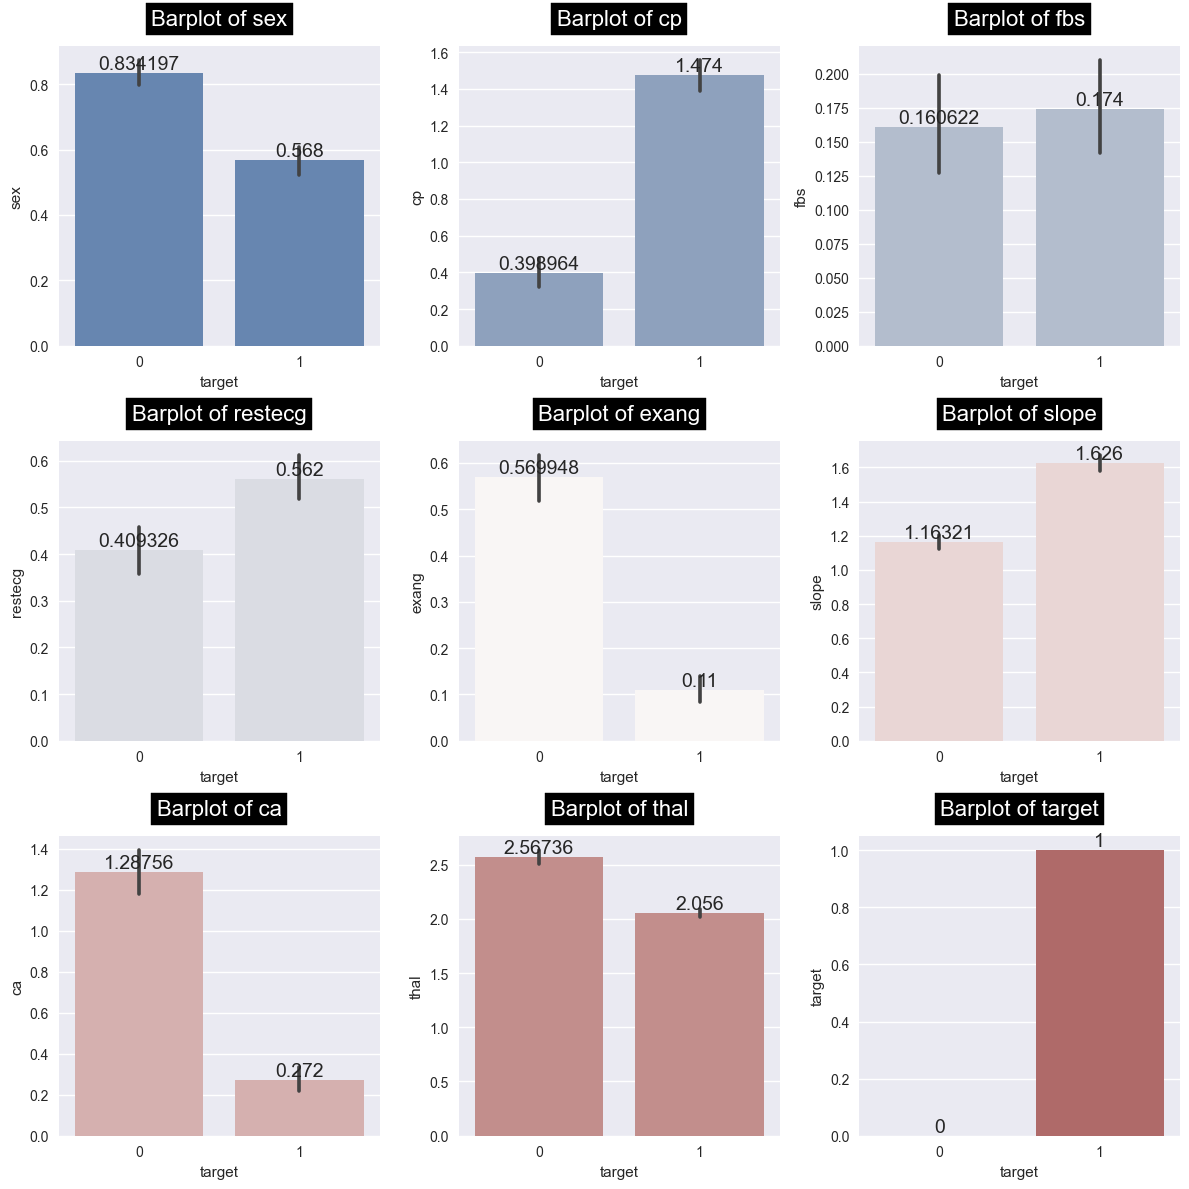

In [7]:
utils.custom_barplot(
    df=cat_df, target_col=cat_df['target'], ncols=3, figsize=(12, 12), color=color
)

<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
2.3 | Visualize Numerical data
</b>
</span>
</h3>

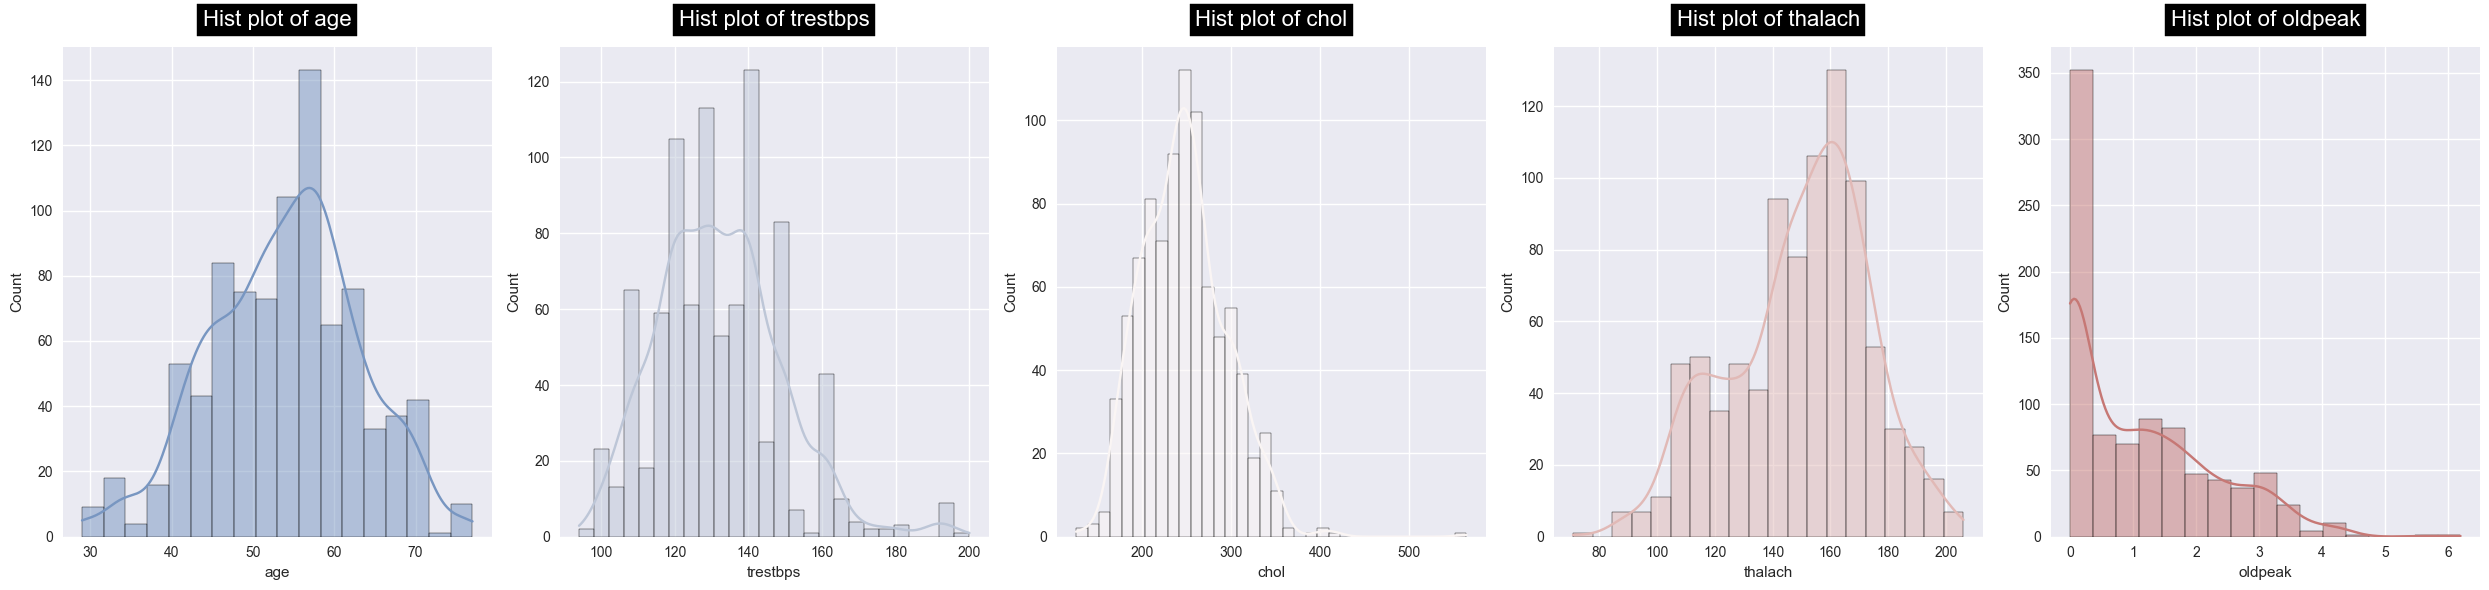

In [8]:
utils.custom_histplot(df=num_df, ncols=5, figsize=(25, 6), color=color)

<br>

Now let's draw box plot to detect outliers in numerical data.

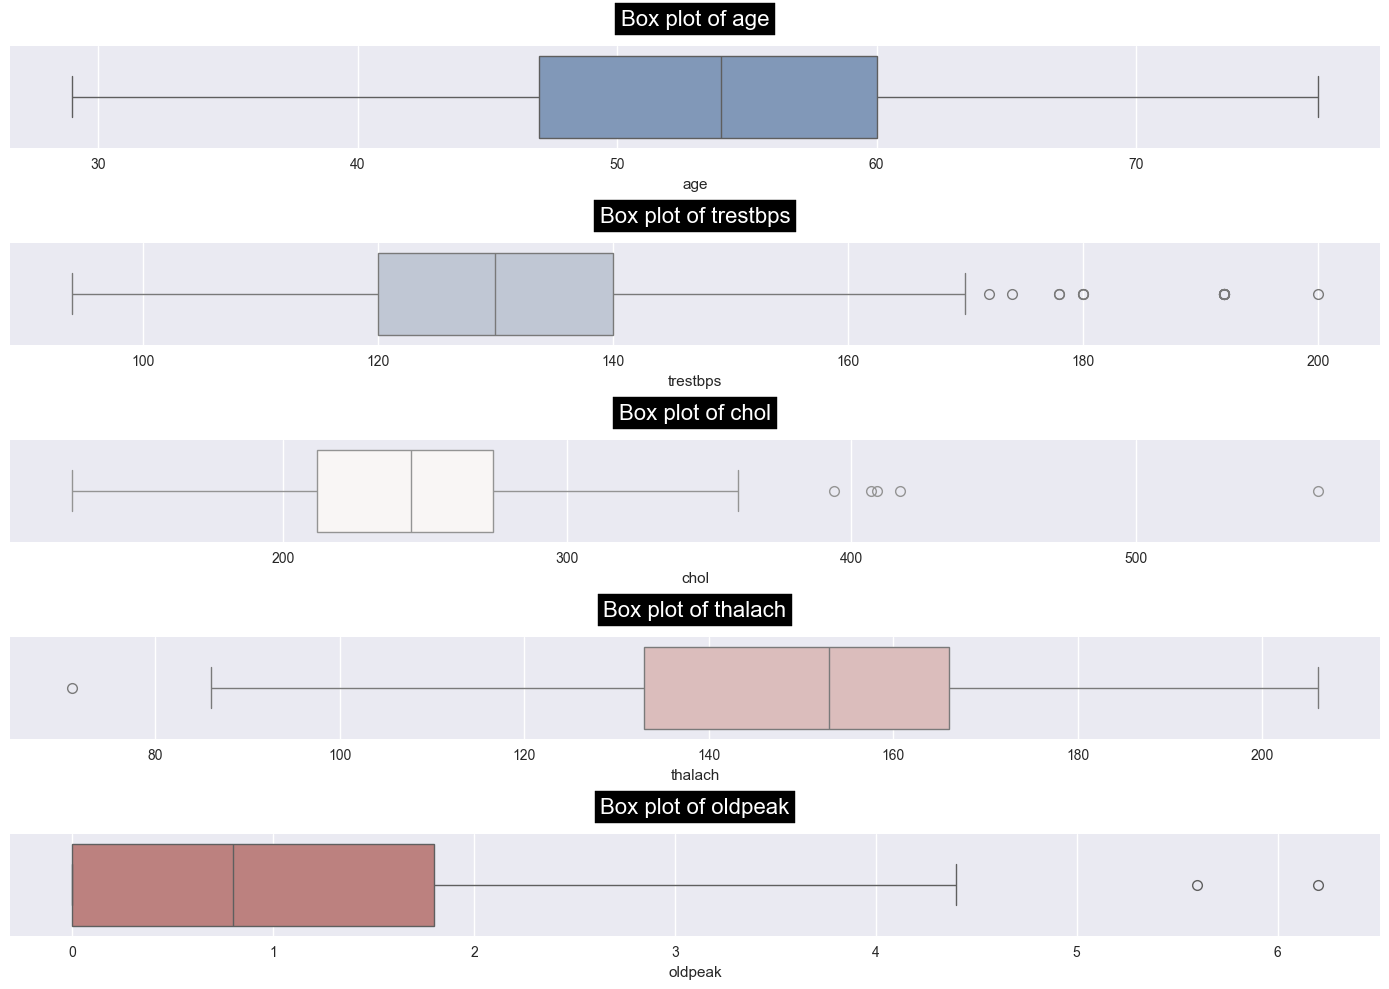

In [9]:
utils.custom_boxplot(df=num_df, ncols=1, color=color)

> Insight: The data has relatively few outliers.

<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
3 | Data Prerocessing
</b>
</span>
</h2>

Based on all of the boxplots, trestbps, chol, fbs, oldpeak, ca and thal columns have outliers, especially column `fbs`.

In [10]:
df_ = utils.remove_outliers_byusing_quantile(df=df)

Dataset shape Before remove outlier: (886, 14)
age: 0
sex: 0
cp: 0
trestbps: 17
chol: 5
fbs: 149
restecg: 0
thalach: 1
exang: 0
oldpeak: 2
slope: 0
ca: 72
thal: 2
target: 0
Dataset shape After remove outlier: (668, 14)


<br>

Now we evaluate the correclation among the features based on correlation matrix below:

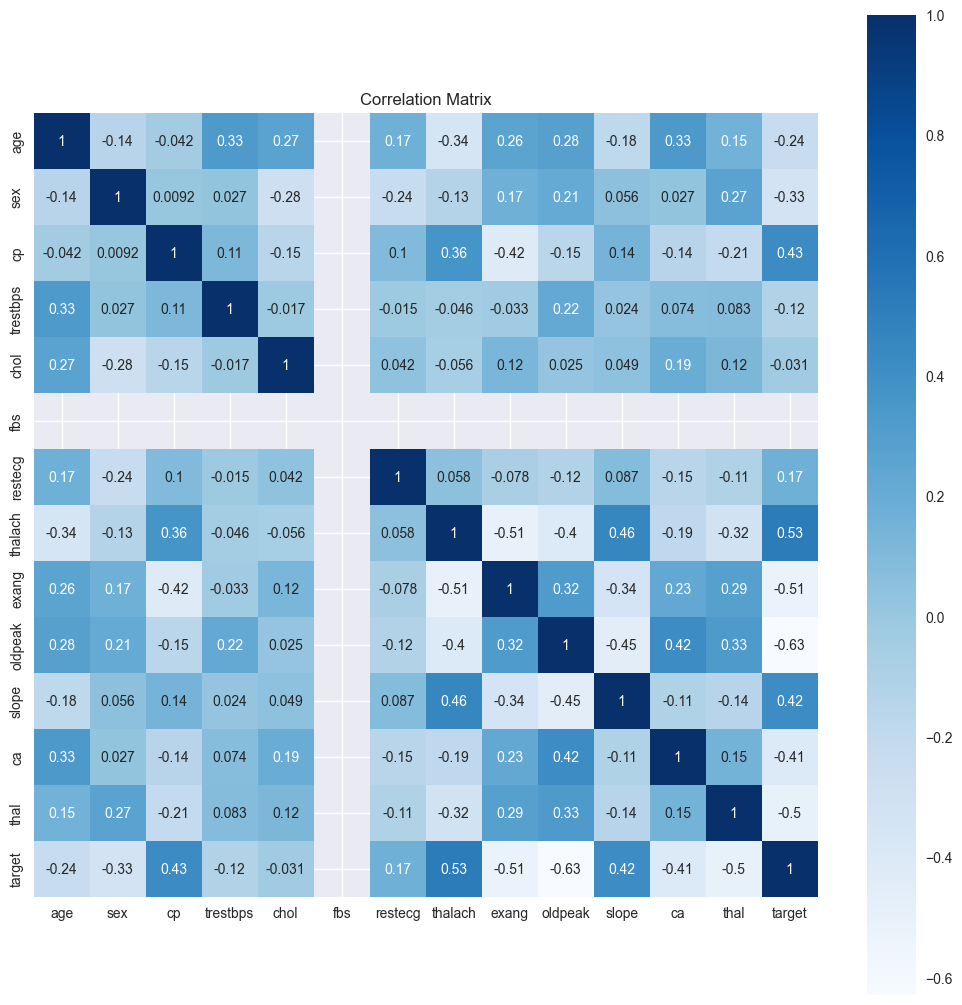

In [11]:
utils.custom_heatmap(df=df_, figsize=(10, 10), color='Blues')

The last row show we the correlation between target and other features. We can see 3 columns has the highest positive correlation with target include:` cp(0.43)`, `thalach(0.53)` and `slope(0.42)` while `chol(-0.031)` has the correlation index close to 0, meaning it is almost uncorrelated with target.

In [12]:
processed_df = utils.remove_uncorrelated_feature(df=df_.copy())
processed_df.shape

(668, 13)

<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
4 | Feature Engineering
</b>
</span>
</h2>

<br>

Now we see the heatmap of our data again after preprocessing step:

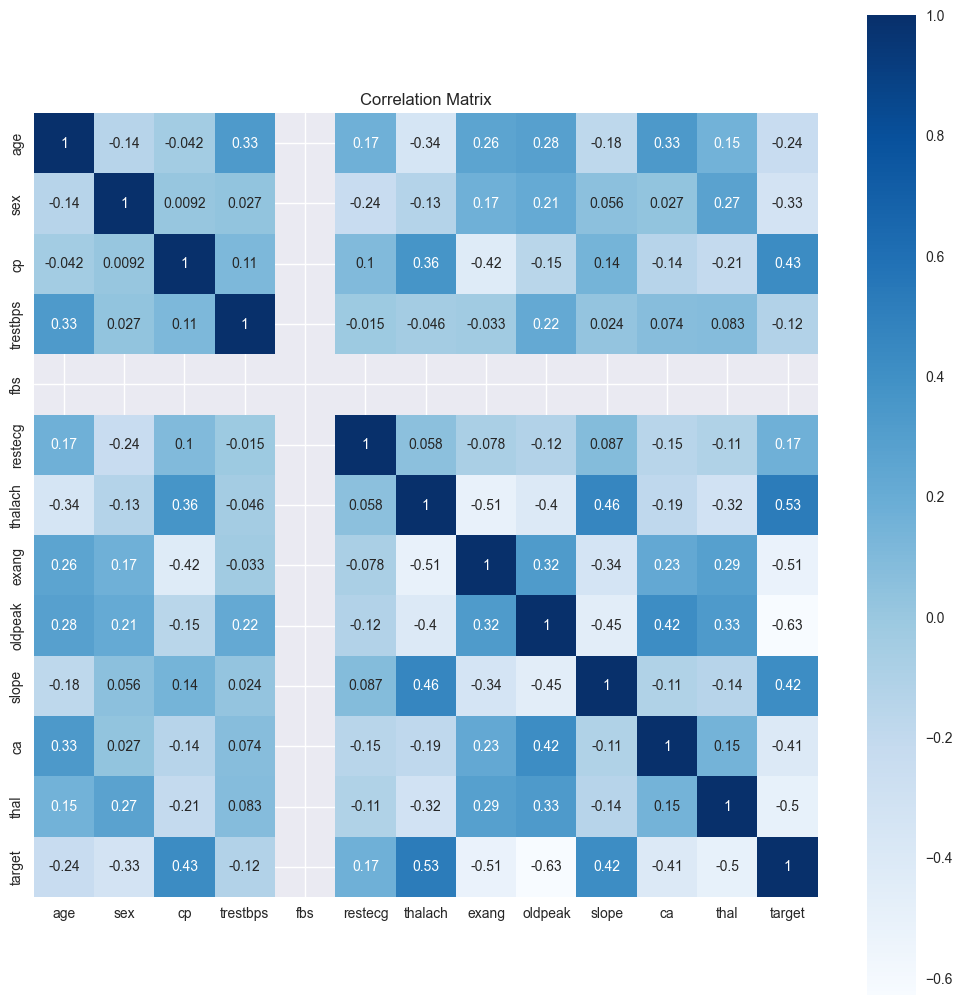

In [13]:
utils.custom_heatmap(df=processed_df, figsize=(10, 10), color='Blues')

<br>

Prepare data for train-test split step:

In [14]:
X, y = utils.prepare_x_y(df=processed_df, target='target')
print(f'X shape: {X.shape}\nY shape: {y.shape}')

X shape: (668, 12)
Y shape: (668, 1)


<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
5 | Build and Train Model
</b>
</span>
</h2>

<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
5.1 | Split data
</b>
</span>
</h3>

In [15]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 24
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(
    X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, shuffle=True
)
print(f'Train X shape: {trainX.shape}')
print(f'Train y shape: {trainY.shape}')
print(f'Test X shape: {testX.shape}')
print(f'Test y shape: {testY.shape}')

Train X shape: (534, 12)
Train y shape: (534, 1)
Test X shape: (134, 12)
Test y shape: (134, 1)


<br>
<h3 align='center'>
<span style='background:lightblue; color:navy'>
<b>
5.2 | Build Logistic Regression model
</b>
</span>
</h3>

Creating a pipeline helps streamline these steps, ensuring that each transformation is applied consistently to both the training and test data. To support model gain the best performance, we using a Pipeline.

We create a pipeline with preprocessing steps (like Standard scaling) and the logistic regression model. Train the model using the Training set, make predictions on the Testing set, and evaluate the model's performance using classification metrics.

<div class='alert alert-info' role='alert'>
<strong>Why we choose StandardScaler for Logistic Regression model?</strong>

Our model is Logistic Regression and we detected outliers in previous steps, so StandardScaler() is generally more appropriate, as it standardizes the data to have a mean of 0 and standard deviation of 1, which helps in better convergence and performance of the model.

</div>

<br>

Build the Logistic model, we just use the parameter `l1_ratio` while the penalty is 'elasticnet'.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import ClassifierMixin
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from typing import Dict, Any


def build_model(
    X: np.array, y: np.array, penalty: str, solver: str, l1_ratio: float = 0
):
    '''
        Design your model and train it (including your best params)
        :param X: feature matrix
        :param y: target
        :return: a model
    '''
    # Todo: Input your scaler and logistic model into pipeline
    if penalty == 'elasticnet':
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(penalty=penalty, solver=solver, l1_ratio=l1_ratio)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(penalty=penalty, solver=solver)
        )
    # Todo: fit your model with X, y
    model.fit(X, y)
    return model


def best_params(
    model: ClassifierMixin,
    param_grid: Dict[str, list],
    trainX: np.array = trainX,
    trainY: np.array = trainY,
    scoring: str = 'neg_mean_absolute_error',
    cv: int = 5
) -> Dict[str, Any]:
    '''
        Find the best params for your model above (including your best params)
        :param model: the model you have design
        :return: a model with best params
    '''
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring
    )
    grid_search.fit(trainX, trainY)
    best_params = grid_search.best_params_
    print(f'Best parameters found: {best_params}')
    return best_params

<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
6 | Model Performance
</b>
</span>
</h2>

In [17]:
best_params = best_params(
    model=ElasticNet(),
    param_grid={
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1.0],
        'l1_ratio': [1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 0.1, 0.5, 0.8]
    }
)

Best parameters found: {'alpha': 1e-05, 'l1_ratio': 1e-08}


In [18]:
choose_solver = {}

choose_solver['lbfgs'] = ['l2', None]
choose_solver['liblinear'] = ['l1', 'l2']
choose_solver['newton-cg'] = ['l2', None]
choose_solver['newton-cholesky'] = ['l2', None]
choose_solver['sag'] = ['l2', None]
choose_solver['saga'] = ['elasticnet', 'l1', 'l2', None]

------------------------------
Solver: lbfgs - Penalty: l2
Precision: 0.9770114942528736
Recall: 1.0
Accuracy: 0.9850746268656716
F1: 0.9883720930232558
Confusion matrix:
[[47  2]
 [ 0 85]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99      0.98      0.98       134
weighted avg       0.99      0.99      0.99       134

------------------------------
Solver: lbfgs - Penalty: None
Precision: 0.9770114942528736
Recall: 1.0
Accuracy: 0.9850746268656716
F1: 0.9883720930232558
Confusion matrix:
[[47  2]
 [ 0 85]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        85

    accuracy                           0.99       134
   macro avg       0.99    

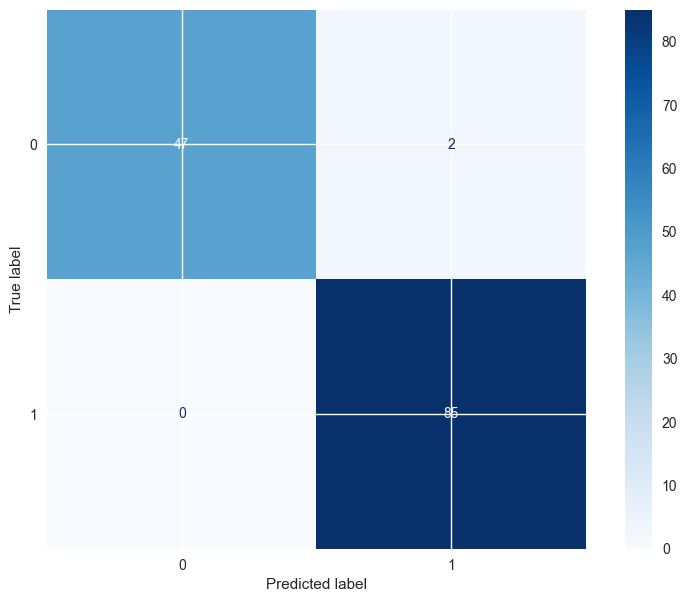

In [19]:
models = pd.DataFrame(columns=['solver', 'penalty', 'f1_score'])

for solver, penalties in choose_solver.items():
    for penalty in penalties:
        model = build_model(
            X=trainX,
            y=trainY,
            penalty=penalty,
            solver=solver,
            l1_ratio=best_params['l1_ratio']
        )
        print('-' * 30)
        print(f'Solver: {solver} - Penalty: {penalty}')
        
        pred = model.predict(testX)
        f1 = utils.calculate_performance(
            y_true=testY, y_pred=pred, main_score='f1'
        )
        
        models = models._append(
            {
                'solver': solver,
                'penalty': penalty,
                'f1_score': f1
            }, 
            ignore_index=True
        )

utils.display_cfs_matrix(y_true=testY, y_pred=pred, color='Blues')

<br>

<h2 align='center'>
<span style='background:black; color:blue'>
<b>
7 | Which is the main metric and the best solver, penalty?
</b>
</span>
</h2>

In [20]:
display(models)

,solver,penalty,f1_score
0,lbfgs,l2,0.988372
1,lbfgs,None,0.988372
2,liblinear,l1,0.988372
3,liblinear,l2,0.988372
4,newton-cg,l2,0.988372
5,newton-cg,None,0.988372
6,newton-cholesky,l2,0.988372
7,newton-cholesky,None,0.988372
8,sag,l2,0.988372
9,sag,None,0.988372


Based on the document of Logistic Regressionn in Scikit-learn, defalut solver is ‘lbfgs’.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss.
- liblinear’ and ‘newton-cholesky’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrapt it with the `OneVsRestClassifier`.
- ‘newton-cholesky’ is a good choice for `n_samples >> n_features`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features` because it explicitly computes the Hessian matrix.

<div class='alert alert-info' role='alert'>

<strong>Conclusion</strong>

For our problem, all solvers and corresponding penalties (only saga matches all penalties). In models table, all models return F1_Score greater than 0.988 (approximate 0.99).

That is a very good parameter to ensure the model has high performance and is suitable for practical use.

</div>